## Feature Extraction from the time windows
The goal is to create hand crafted features for extracting best information from the time windows. Consider the dataset from one patient `AB sz1.edf`. The channels are selected from **localized brain regions** that correspond to region specificity of the disorder namely, right temporal lobe epilepsy.  Let's import the packages first

GOAL: Window analysis by best **feature crafting**

In [1]:
import numpy as np
import os
import pyedflib
import csv
import pandas as pd
import matplotlib.pyplot as plt
import statistics

src_path = os.getcwd() + '\\csv_preictal_window\\'
filenames = [f for f in os.listdir(src_path)]
print(filenames)
fileindex = -1

ImportError: No module named pyedflib

In [69]:
''' This module has essential functions supporting
fast and effective computation of permutation entropy and
its different variations.'''
import itertools
import numpy as np
import pandas as pd
from scipy.spatial.distance import euclidean

def s_entropy(freq_list):
    ''' This function computes the shannon entropy of a given frequency distribution.
    USAGE: shannon_entropy(freq_list)
    ARGS: freq_list = Numeric vector represnting the frequency distribution
    OUTPUT: A numeric value representing shannon's entropy'''
    freq_list = [element for element in freq_list if element != 0]
    sh_entropy = 0.0
    for freq in freq_list:
        sh_entropy += freq * np.log(freq)
    sh_entropy = -sh_entropy
    return(sh_entropy)

def ordinal_patterns(ts, embdim, embdelay):
    ''' This function computes the ordinal patterns of a time series for a given embedding dimension and embedding delay.
    USAGE: ordinal_patterns(ts, embdim, embdelay)
    ARGS: ts = Numeric vector represnting the time series, embdim = embedding dimension (3<=embdim<=7 prefered range), embdelay =  embdding delay
    OUPTUT: A numeric vector representing frequencies of ordinal patterns'''
    time_series = ts
    possible_permutations = list(itertools.permutations(range(embdim)))
    lst = list()
    for i in range(len(time_series) - embdelay * (embdim - 1)):
        sorted_index_array = list(np.argsort(time_series[i:(embdim+i)]))
        lst.append(sorted_index_array)
    lst = np.array(lst)
    element, freq = np.unique(lst, return_counts = True, axis = 0)
    freq = list(freq)
    if len(freq) != len(possible_permutations):
        for i in range(len(possible_permutations)-len(freq)):
            freq.append(0)
        return(freq)
    else:
        return(freq)

def p_entropy(op):
    ordinal_pat = op
    max_entropy = np.log(len(ordinal_pat))
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat)))
    return(s_entropy(p)/max_entropy)

Reading ND sz4.csv now!
        Fpz        Fz        Cz        Pz       Fp2        F4        F8  \
0  0.008711  0.000409 -0.000773 -0.000292 -0.000126 -0.000013 -0.000169   
1  0.008711  0.000216 -0.000778 -0.000306 -0.000126 -0.000011 -0.000170   
2  0.008711  0.000248 -0.000780 -0.000316 -0.000126 -0.000012 -0.000169   
3  0.008711  0.000440 -0.000772 -0.000303 -0.000121 -0.000006 -0.000161   
4  0.008711  0.000408 -0.000767 -0.000295 -0.000120 -0.000004 -0.000160   

         T4        T6        A2        O2        C4        P4  
0  0.000009 -0.000450 -0.000866 -0.000316 -0.000133 -0.000021  
1  0.000011 -0.000449 -0.000865 -0.000317 -0.000133 -0.000022  
2  0.000014 -0.000448 -0.000867 -0.000320 -0.000134 -0.000023  
3  0.000018 -0.000442 -0.000866 -0.000316 -0.000131 -0.000021  
4  0.000019 -0.000441 -0.000866 -0.000309 -0.000127 -0.000022  
PREICTAL STATS
Window size: 9 seconds
Number of samples: 148942 samples
Number of channels: 12 channels
Sampling frequency: 200 Hz
Window sam

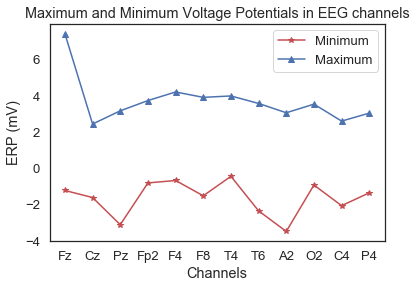

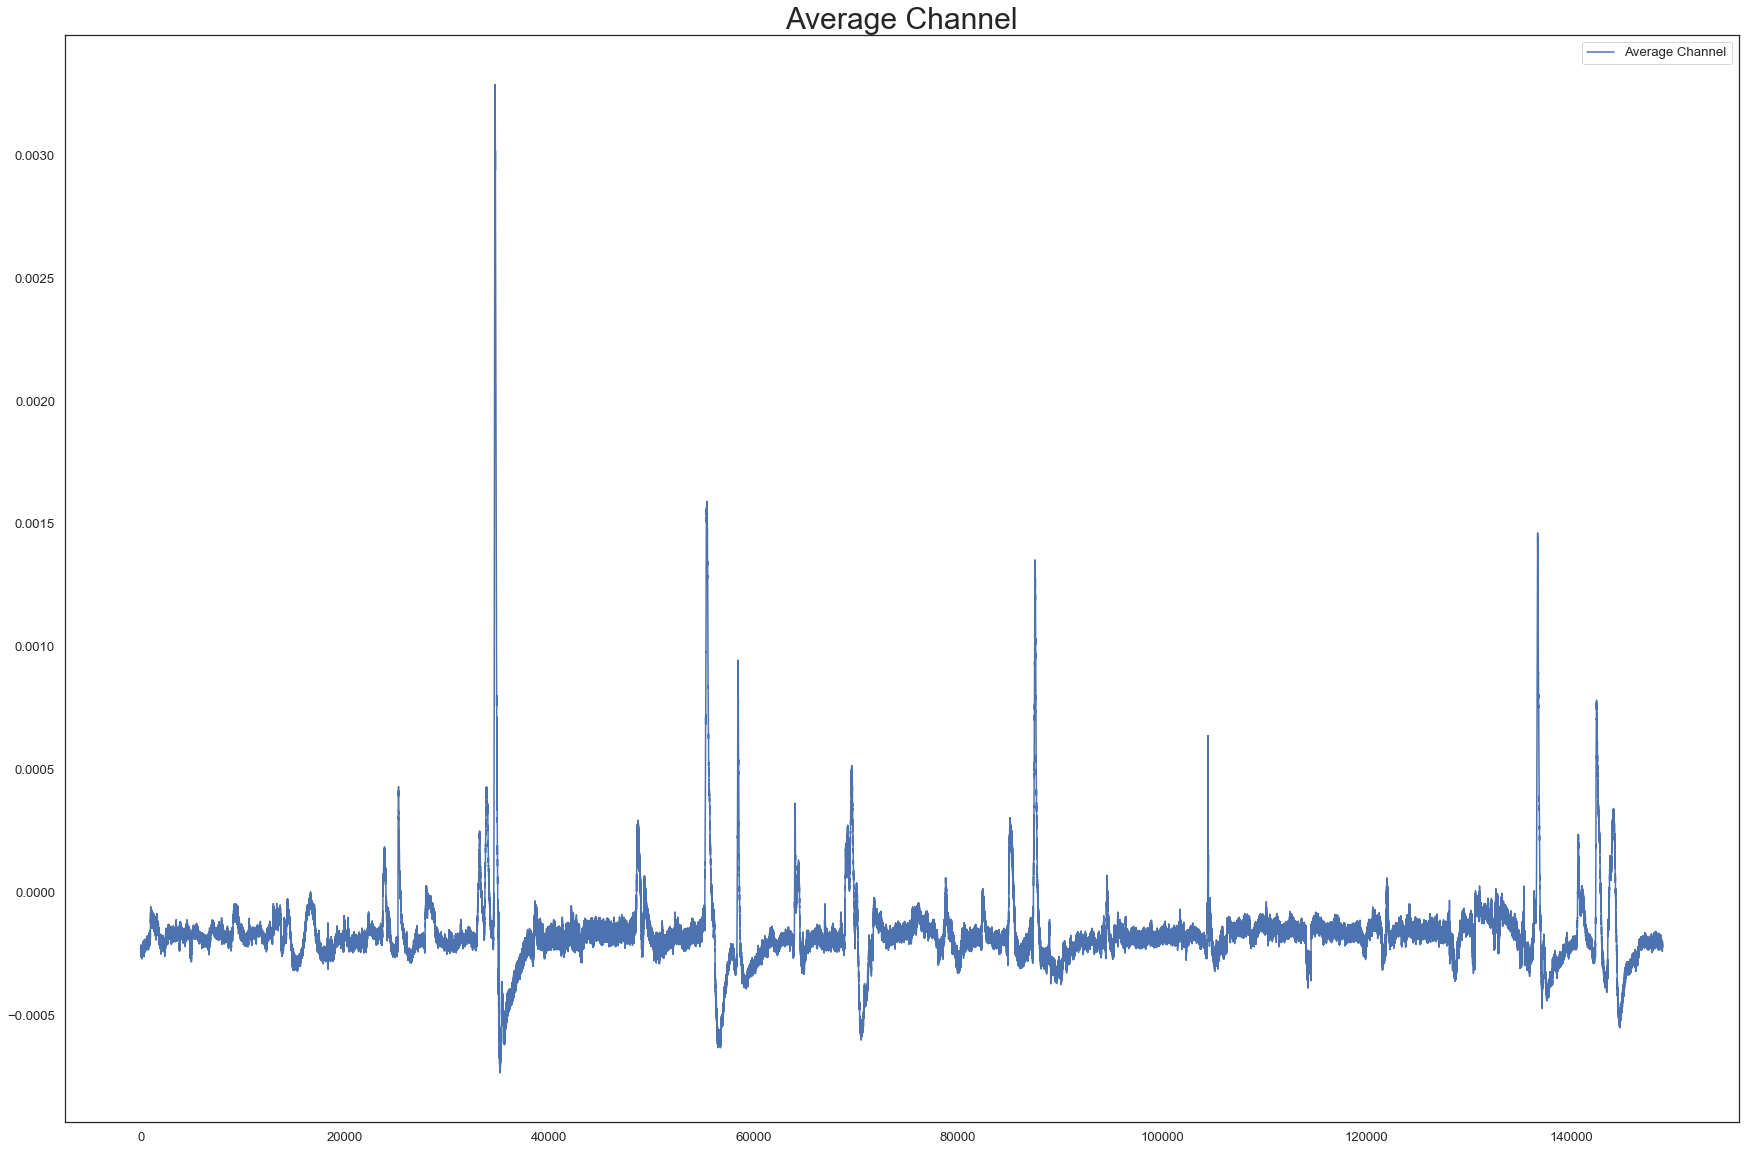

In [152]:
fileindex += 1
print(f'Reading {filenames[fileindex]} now!')
# Name of the src path
src_path = os.getcwd() + '\\csv_preictal_window\\'+filenames[fileindex]

# Let's see the data first
df = pd.read_csv(src_path, index_col=0)
print(df.head())
df = df.drop('Fpz',1)
# There are 13 channels/ features that are chosen for analysis based on the disease focality
# This is not the case of feature selection using the random forests mechanism
max_vals = df.max(axis=0)*1e+3
min_vals = df.min(axis=0)*1e+3
# There is some coherence in the maximum and minimum values
plt.plot(min_vals, 'r*-', label='Minimum')
plt.plot(max_vals, 'b^-', label='Maximum')
plt.xlabel('Channels')
plt.ylabel('ERP (mV)')
plt.title('Maximum and Minimum Voltage Potentials in EEG channels')
plt.legend()

#############################################################################
### STEP 0
### Displaying Characteristics in Preictal State
### Number of windows is equal to the number of features that is extracted.
#############################################################################
if fileindex in [0,1,2,3,5,6,9,10,11,12,13,21]:
    window = 2
    fs = 200
elif fileindex in [4]:
    window = 0.05
    fs = 200
elif fileindex in [7,8,14,15,16,17,18,19,20]:
    window = 2
    fs = 256
elif fileindex in [22, 23, 24, 25]:
    window = 9
    fs = 200

Ns, n_chan = df.shape[0], df.shape[1]

ts = Ns/fs
n_wind = int(Ns/(window*fs))
wind_size = int(window*fs)

print(f'PREICTAL STATS')
print(f'Window size: {window} seconds')
print(f'Number of samples: {Ns} samples')
print(f'Number of channels: {n_chan} channels')
print(f'Sampling frequency: {fs} Hz')
print(f'Window sampling size: {wind_size} samples')
print(f'Number of windows: {n_wind} windows')
print(f'Total recording time: {ts} seconds')

##############################################################################
### Window Extraction Procedure

# STEP 1: Take the average of all the channels and form one channel

# STEP 2: Extract windows

# STEP 3: Calculate the features

# STEP 4: Plot the features
##############################################################################
### STEP 1 - Take the Average of the Channels and form the Surrogate channel
##############################################################################
# STEP 1 - Forming the Average Surrogate Channel
df_new = pd.DataFrame()
df_new['surrogate'] = df.mean(axis=1)
plt.figure(figsize=(30,20))
plt.plot(df_new, label='Average Channel')
plt.title('Average Channel', fontsize=30)
plt.legend()

Saving Activity figure now...
Saved figure!
Saving Mobility and complexity figure now...
Saved Figure!
Saving Kurtosis figure...
Saved figure!
Saving Permutation Entropy figure...
Saved figure!
Saving Mean and Standard Deviation figure...
Saved figure!
Saving Relative and Total Band power figure...
Saved figure!


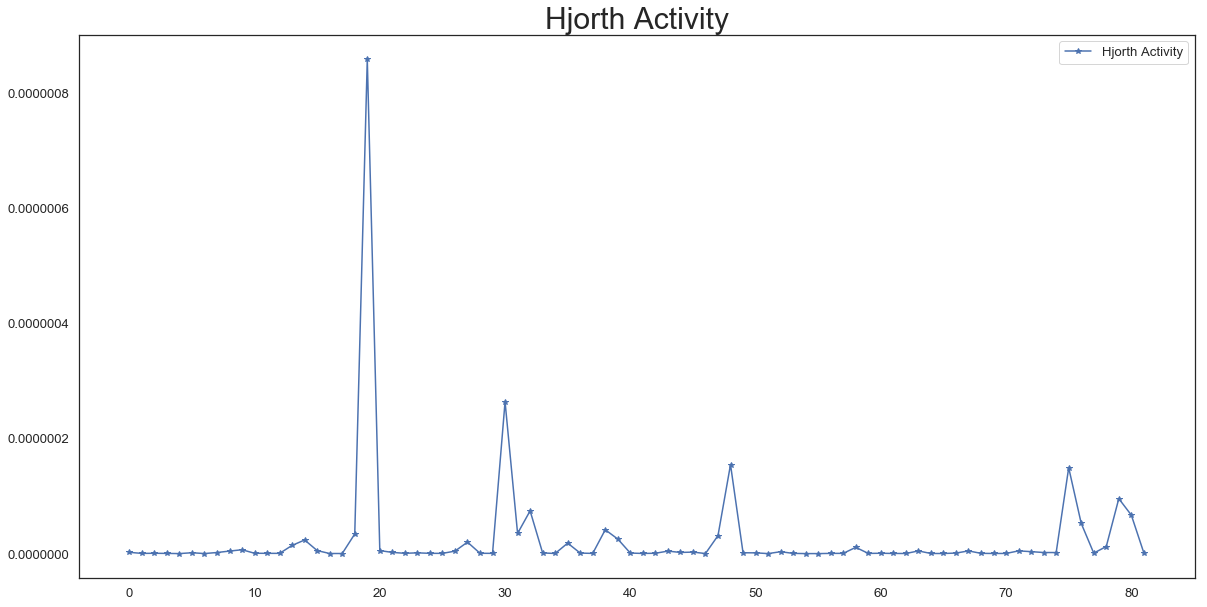

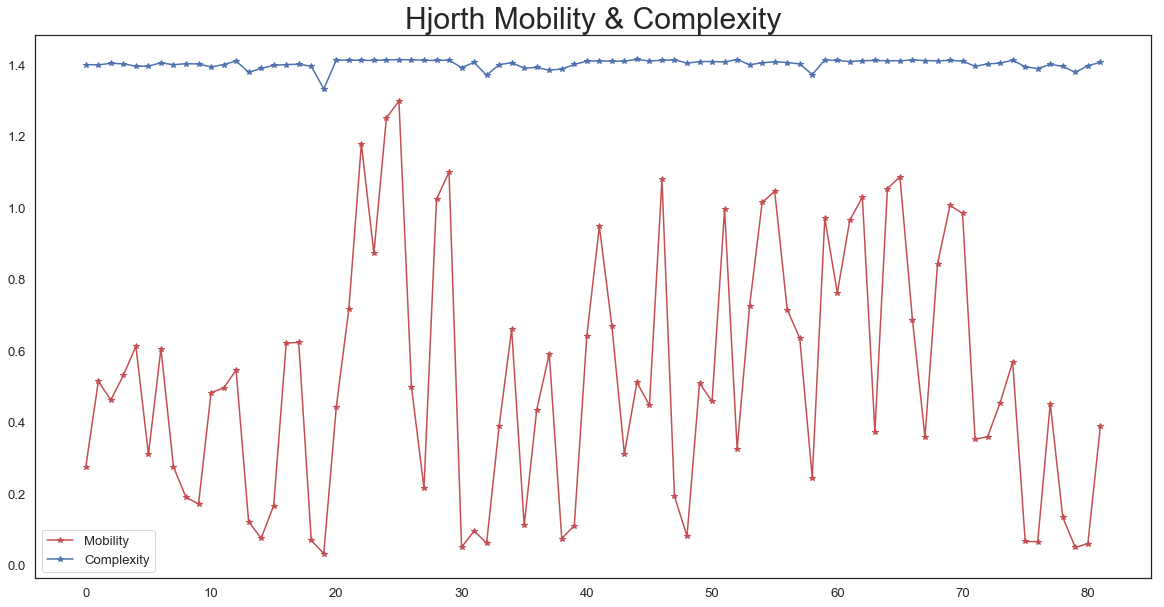

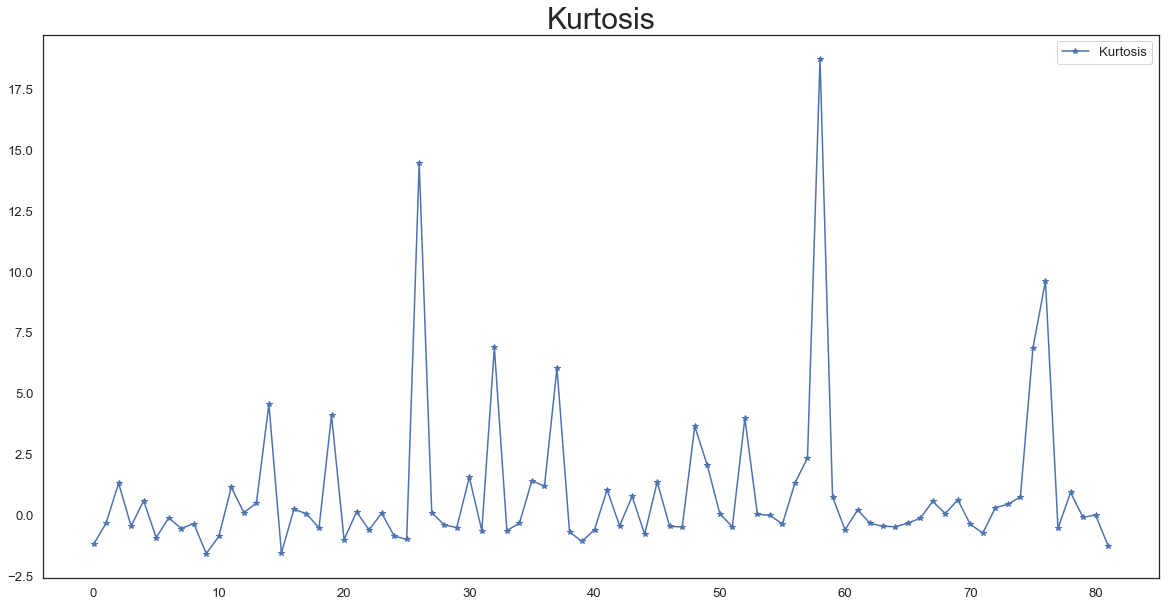

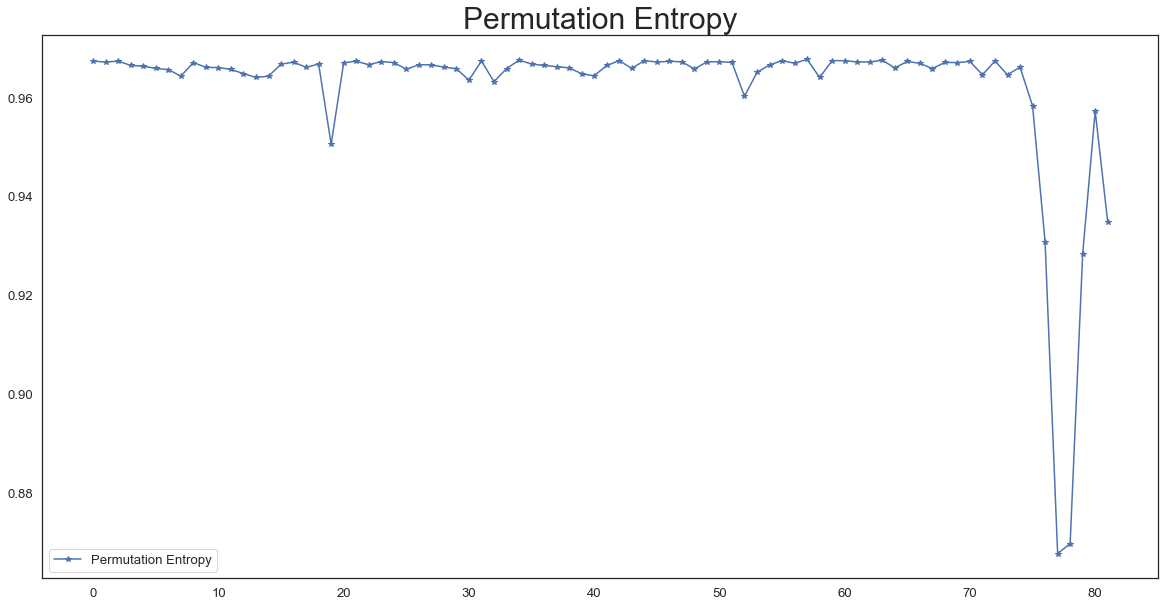

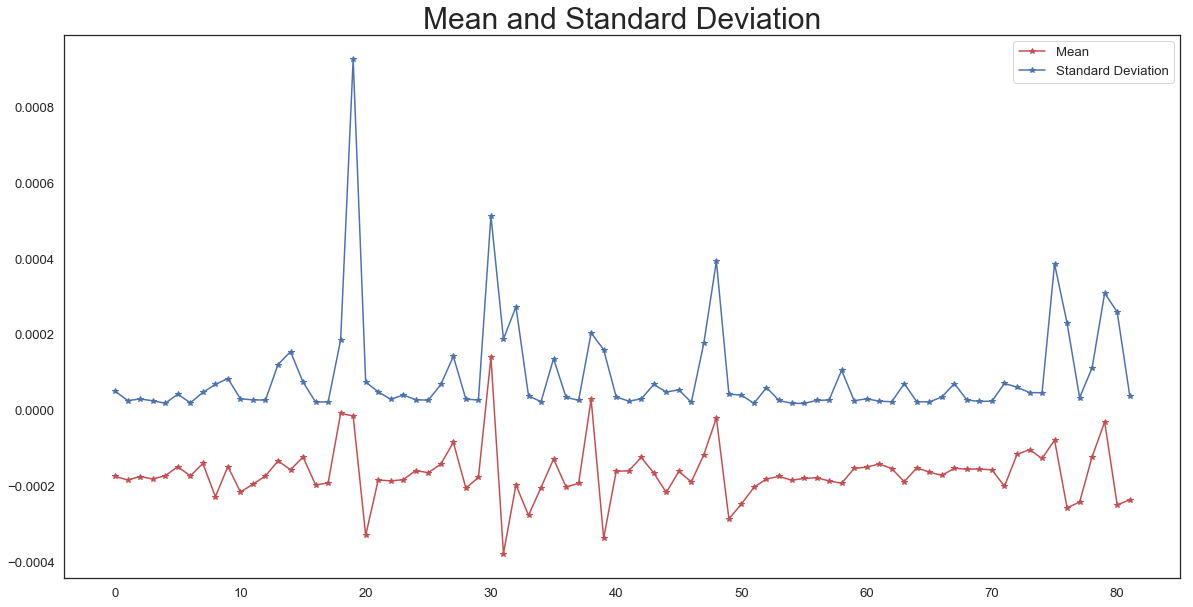

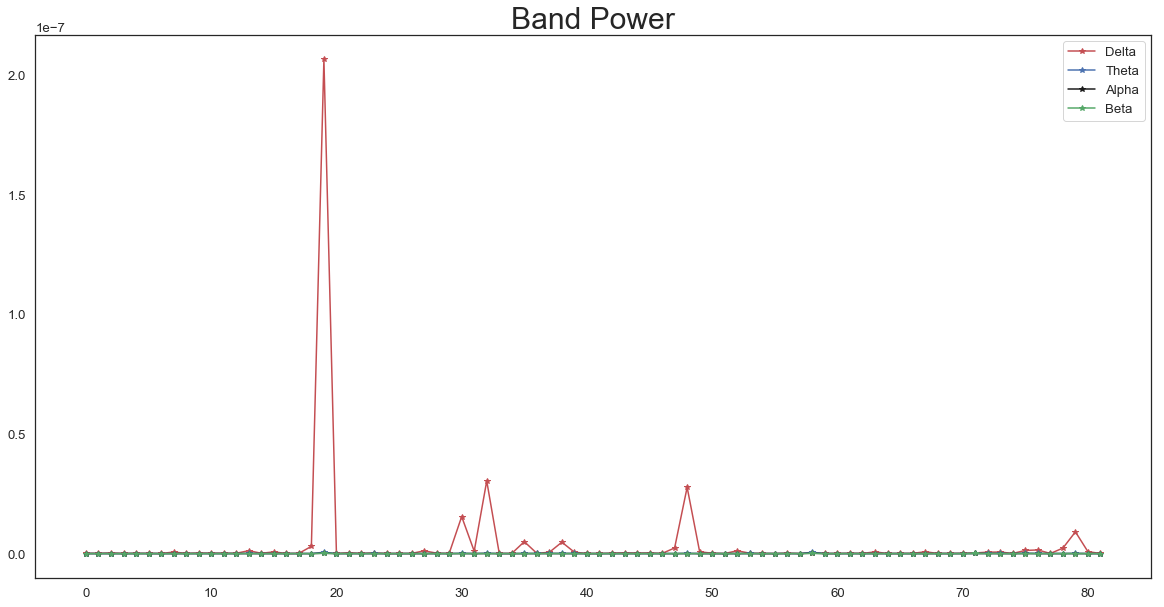

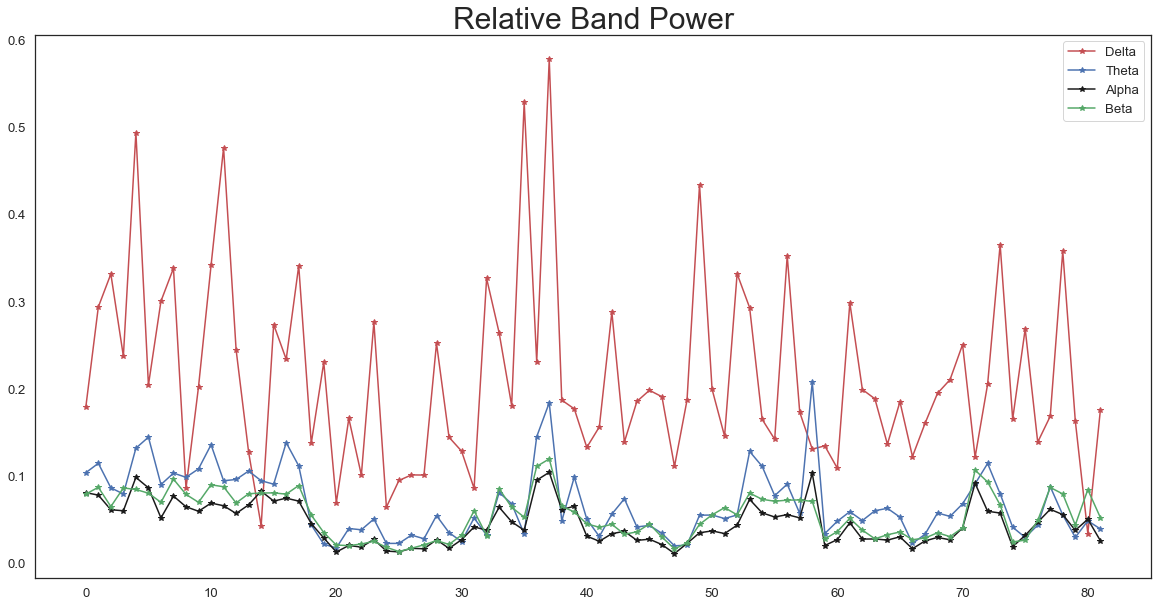

In [153]:
###############################################################################
### STEP 2  - Extracting the Windows and Plotting them
# STEP 2: Extract Windows and plot them
###############################################################################
# dt = 1/fs
# t = np.arange(0,window,dt)
# fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(36,36))
# nrow = 0
# ncol = 0
# start_val = 0
# print(f"{n_wind} Windows")
# print(f"Plotting 36 or lesser of them now...")
# for i in range(n_wind):
#     # 400 sample window containig average of the samples
#     curr_wind = df_new.iloc[start_val:start_val+ wind_size,:]
#     curr_list = curr_wind.surrogate.tolist()
#     if ncol < 6:
# #         print(f'plot {i+1} at [{nrow}, {ncol}]')
#         axes[nrow, ncol].plot(t, curr_list)
#         ncol += 1
#     else:
#         ncol = 0
#         nrow += 1
#         if nrow < 6: 
# #             print(f'plot {i+1} at [{nrow}, {ncol}]')
#             axes[nrow, ncol].plot(t, curr_list)
#         ncol += 1
#     start_val += wind_size
    
###########################################################################
# STEP 3:  Get the Hjorth Activity of the Preictal Signal
###########################################################################
start_val = 0
# Permutation Entropy Hyperparameters
embdim = 3 # Can range from 3 to 7
embdelay = 1
# Define lower and upper limits of bands
low_freq = [0.5, 4, 8, 12] 
high_freq = [4, 8, 12, 30]
band_name = ['Delta', 'Theta', 'Alpha', 'Beta']

# Mobility complexity & activity of all the windows
hjorth_mobility = np.zeros(n_wind)   
hjorth_complexity = np.zeros(n_wind)
hjorth_activity = np.zeros(n_wind)
# Kurtosis of all windows
kurtosis = np.zeros(n_wind)
# Permutation Entropy of all windows
permutation_entropy = np.zeros(n_wind)
# Mean and Standard Deviation of all windows
mean = np.zeros(n_wind)
sd = np.zeros(n_wind)
# Frequency Feature - Band power and Relative Band power
bp = np.zeros((n_wind, 4))
rel_bp = np.zeros((n_wind, 4))


for i in range(n_wind):
    # wind_size sample window containig average of the samples
    curr_wind = df_new.iloc[start_val:start_val+wind_size,:]
    curr_list = curr_wind.surrogate.tolist()
    diff1 = np.diff(curr_list)
    diff2 = np.diff(curr_list, n=2)
    hjorth_activity[i] = np.var(curr_list)
    hjorth_mobility[i] = np.sqrt(np.var(diff1)/hjorth_activity[i])
    hjorth_complexity[i] = np.sqrt(np.var(diff2)/np.var(diff1))
    kurtosis[i] = curr_wind.kurtosis()
    pattern = ordinal_patterns(curr_list, embdim, embdelay)
    permutation_entropy[i] = p_entropy(pattern)
    mean[i] = np.mean(curr_list)
    sd[i] = np.std(curr_list)
    ind = 0
    for name, low, high in zip(band_name, low_freq, high_freq):
        band = []
        # Find intersecting values in frequency vector
        band.append(low)
        band.append(high)
        bp[i, ind] = bandpower(curr_list, fs, band, window_sec=None, relative=False)
        rel_bp[i, ind] = bandpower(curr_list, fs, band, window_sec=None, relative=True)
        ind += 1
    start_val += wind_size
    
# # Printing the Feature details   
# print('Current Feature Specs:')
# print(f"{len(hjorth_activity)} Windows in the signal")
# # Scaling and printing the activity
# print(f"Scaled Activity:\n{hjorth_activity*1e+11}") 
# # Print mobility
# print(f"Mobility:\n{hjorth_mobility*1e1}")
# # Print complexity
# print(f"Complexity:\n{hjorth_complexity}")
# # Print Kurtosis
# print(f"Kurtosis:\n{kurtosis}")
# # Print Permutation Entropy
# print(f"Permutation Entropy:\n{permutation_entropy}")

######################################################################
# STEP 4: Plotting the Activity Feature and the trendline
# Captures the variance of the signal
#######################################################################
plt.figure(figsize=(20,10))
plt.plot(hjorth_activity, 'b*-', label='Hjorth Activity')
# Plotting the Trendline
# x = np.arange(n_wind)
# z = np.polyfit(x, hjorth_activity, 1)
# p = np.poly1d(z)
# plt.plot(x,p(x),"r--", label='Trendline')

# Setting the title and legend
plt.title('Hjorth Activity', fontsize=30)
plt.legend()

# Saving the figure
print('Saving Activity figure now...')
plt.savefig(os.getcwd()+'//HjorthActivity//'+filenames[fileindex][:-4]+'.jpg')
print('Saved figure!')

######################################################################
### STEP 4b - Plot the Mobility and Complexity - Save the result
######################################################################
#The mobility parameter represents the mean frequency or the proportion of standard deviation of the power spectrum. 
#The complexity parameter represents the change in frequency. The parameter compares the signal's similarity to a 
#pure sine wave, where the value converges to 1 if the signal is more similar.
######################################################################

# First order difference of the input
plt.figure(figsize=(20,10))
plt.plot(hjorth_mobility, 'r*-', label='Mobility')

# Second order difference of the input
plt.plot(hjorth_complexity, 'b*-', label='Complexity')

# Set the title and legend
plt.title('Hjorth Mobility & Complexity', fontsize=30)
plt.legend()

# Save the figure
print('Saving Mobility and complexity figure now...')
plt.savefig(os.getcwd()+'//HjorthMobilityComplexity//'+filenames[fileindex][:-4]+'.jpg')
print('Saved Figure!')

#################################################################
### STEP 4c - Plot the Kurtosis - Save the result
#################################################################

plt.figure(figsize=(20,10))
plt.plot(kurtosis, 'b*-',label='Kurtosis')

# Set the title and legend
plt.title('Kurtosis', fontsize=30)
plt.legend()

# Save the figure
print("Saving Kurtosis figure...")
plt.savefig(os.getcwd()+'//Kurtosis//'+filenames[fileindex][:-4]+'.jpg')
print("Saved figure!")

##################################################################
### STEP 4d - Plot the Permutation Entropy - Save the result
##################################################################

plt.figure(figsize=(20,10))
plt.plot(permutation_entropy, 'b*-', label='Permutation Entropy')

# Set the title and legend
plt.title('Permutation Entropy', fontsize=30)
plt.legend()

# Save the figure
print("Saving Permutation Entropy figure...")
plt.savefig(os.getcwd()+'//Permutation Entropy//'+filenames[fileindex][:-4]+'.jpg')
print("Saved figure!")

##################################################################
### STEP 4d - Plot the Mean and Standard Deviation - Save the result
##################################################################
plt.figure(figsize=(20,10))
# Plot the mean
plt.plot(mean, 'r*-', label='Mean')
# Plot the Standard Deviation
plt.plot(sd, 'b*-', label='Standard Deviation')

# Set the title and legend
plt.title('Mean and Standard Deviation', fontsize=30)
plt.legend()

# Save the figure
print("Saving Mean and Standard Deviation figure...")
plt.savefig(os.getcwd()+'//Mean and Standard Deviation//'+filenames[fileindex][:-4]+'.jpg')
print("Saved figure!")

##################################################################
### STEP 4d - Plot the Total and Relative Band Power - Save the result
##################################################################
# Total Band power Figure
plt.figure(figsize=(20,10))
# Plot the Delta Band power
plt.plot(bp[:,0], 'r*-', label='Delta')
# Plot the Theta Band power
plt.plot(bp[:,1], 'b*-', label='Theta')
# Plot the Alpha Band power
plt.plot(bp[:,2], 'k*-', label='Alpha')
# Plot the Beta Band power
plt.plot(bp[:,3], 'g*-', label='Beta')

# Set the legend amd title
plt.title('Band Power', fontsize=30)
plt.legend()

# Save the figure
print("Saving Relative and Total Band power figure...")
plt.savefig(os.getcwd()+'//Band Power//'+filenames[fileindex][:-4]+' Bandpower.jpg')

# Relative Band Power Figure 
plt.figure(figsize=(20,10))
# Plot the Delta Band power
plt.plot(rel_bp[:,0], 'r*-', label='Delta')
# Plot the Theta Band power
plt.plot(rel_bp[:,1], 'b*-', label='Theta')
# Plot the Alpha Band power
plt.plot(rel_bp[:,2], 'k*-', label='Alpha')
# Plot the Beta Band power
plt.plot(rel_bp[:,3], 'g*-', label='Beta')

# Set the title and legend
plt.title('Relative Band Power', fontsize=30)
plt.legend()

# Save the figure
plt.savefig(os.getcwd()+'//Band Power//'+filenames[fileindex][:-4]+' RelativeBandpower.jpg')
print("Saved figure!")

### STEP 5 - Saving the features in CSV file

In [154]:
# Writing the Features to a file
names = ['Activity','Mobility','Complexity', 'Kurtosis', 'Permutation Entropy', 
         'Mean', 'Standard Deviation',
         'Delta BP','Theta BP', 'Alpha BP','Beta BP',
         'Deta RBP','Theta RBP', 'Alpha RBP', 'Beta RBP'
        ]
# Name the CSV file for a particular patient to store the features
path = os.getcwd()+"//FeatureFolder//"
csv_file = path+filenames[fileindex][:-4]+'features.csv'
feature_df = pd.DataFrame(
{
    names[0]  : hjorth_activity,
    names[1]  : hjorth_mobility,
    names[2]  : hjorth_complexity,
    names[3]  : kurtosis,
    names[4]  : permutation_entropy,
    names[5]  : mean,
    names[6]  : sd,
    names[7]  : bp[:,0],
    names[8]  : bp[:,1],
    names[9]  : bp[:,2],
    names[10] : bp[:,3],
    names[11] : rel_bp[:,0],
    names[12] : rel_bp[:,1],
    names[13] : rel_bp[:,2],
    names[14] : rel_bp[:,3]
}
)
print('Saving features in file...')
feature_df.to_csv(csv_file, index=False)
print('Saving done!')

Saving features in file...
Saving done!


---

## PART 2 - Complexity Measures
The various complexity measures for the measurement of the nature of the signals are as follows: entropies, fractal dimensions, and Lyapunov exponent  [Bandt et al](https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.88.174102)

[Calculation of Permutation Entropy](https://www.aptech.com/blog/permutation-entropy/)

[CODE LINK](https://github.com/srk-srinivasan/Permutation-Entropy/blob/master/p_entropy.py)


## PART 3 - Spectral Feature
**Power Spectral Density** - This is defined as the distribution of the power over frequency. 

These are the following bands under consideration:<br>
- δ (0.5–4 Hz)
- θ (4–8 Hz)
- α (8–13 Hz)
- β2 (13–20 Hz)
- β1 (20–30 Hz)
- γ (30–60 Hz)

The PSD can be a feature and this is in general applied to a stationary wave/ time series wave. Here, the length of the windows are constant without any overlap between them. Thus, it can be extended to consider the non-stationary nature of the EEG signals [Right questions to ask about EEG but..](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2698918/#B4). When we consider 2 second windows they help in approximating the stationarity of the EEG signal[McGrogan, N., Neural Network Detection of Epileptic Seizures in the Electroencephalogram, 1999,](http://www.new.ox.ac.uk/∼nmcgroga/work/transfer/). 

T

**Average/ Relative Band power Band Power** - This is a single number which summarizes the overall contribution of the given frequency to the overall power of the signal. Single number features are good for the current scenario where we have different number of features. 

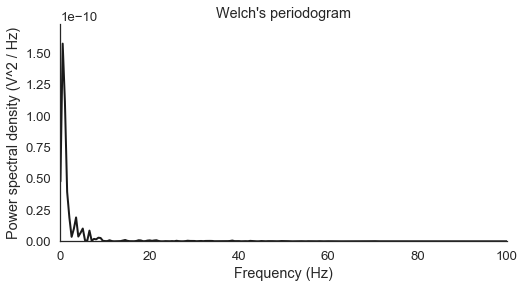

In [30]:
from scipy.signal import welch
import seaborn as sns
# Define Window length (2 seconds)
win = 400
freqs, psd = welch(curr_list, 200, nperseg=win)

# Plot the power spectrum
sns.set(font_scale=1.2, style='white')
plt.figure(figsize=(8,4))
plt.plot(freqs, psd, color='k', lw=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
plt.xlim([0, freqs.max()])
sns.despine()

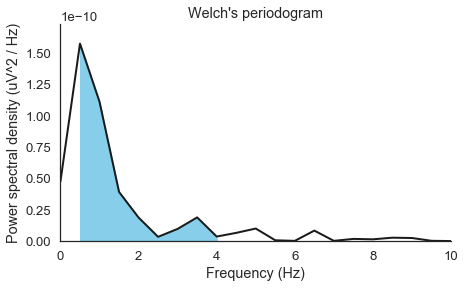

In [31]:
# Define delta lower and upper limits
low, high = 0.5, 4

# Find intersecting values in frequency vector
idx_delta = np.logical_and(freqs >= low, freqs <= high)

# Plot the power spectral density and fill the delta area
plt.figure(figsize=(7, 4))
plt.plot(freqs, psd, lw=2, color='k')
plt.fill_between(freqs, psd, where=idx_delta, color='skyblue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (uV^2 / Hz)')
plt.xlim([0, 10])
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
sns.despine()

In [32]:
from scipy.integrate import simps

# Frequency resolution
freq_res = freqs[1] - freqs[0]  # = 1 / 4 = 0.25

# Compute the absolute power by approximating the area under the curve
delta_power = simps(psd[idx_delta], dx=freq_res)
print('Absolute delta power: %.3f uV^2' % delta_power)

Absolute delta power: 0.000 uV^2


In [33]:
# Relative delta power (expressed as a percentage of total power)
total_power = simps(psd, dx=freq_res)
delta_rel_power = delta_power / total_power
print('Relative delta power: %.3f' % delta_rel_power)

Relative delta power: 0.603


In [43]:
def bandpower(data, sf, band, window_sec=None, relative=False):
    """Compute the average power of the signal x in a specific frequency band.

    Parameters
    ----------
    data : 1d-array
        Input signal in the time-domain.
    sf : float
        Sampling frequency of the data.
    band : list
        Lower and upper frequencies of the band of interest.
    window_sec : float
        Length of each window in seconds.
        If None, window_sec = (1 / min(band)) * 2
    relative : boolean
        If True, return the relative power (= divided by the total power of the signal).
        If False (default), return the absolute power.

    Return
    ------
    bp : float
        Absolute or relative band power.
    """
    from scipy.signal import welch
    from scipy.integrate import simps
    band = np.asarray(band)
    low, high = band

    # Define window length
    if window_sec is not None:
        nperseg = window_sec * sf
    else:
        nperseg = (2 / low) * sf

    if nperseg > len(data):
        nperseg = len(data)
        
    # Compute the modified periodogram (Welch)
    freqs, psd = welch(data, sf, nperseg=nperseg)

    # Frequency resolution
    freq_res = freqs[1] - freqs[0]

    # Find closest indices of band in frequency vector
    idx_band = np.logical_and(freqs >= low, freqs <= high)

    # Integral approximation of the spectrum using Simpson's rule.
    bp = simps(psd[idx_band], dx=freq_res)

    if relative:
        bp /= simps(psd, dx=freq_res)
    return bp

In [51]:
# Define lower and upper limits
low_freq = [0.5, 4, 8, 12] 
high_freq = [4, 8, 12, 30]
band_name = ['Delta', 'Theta', 'Alpha', 'Beta']
if fileindex in [0,1,2,3,5,6,9,10,11,12,13,21]:
    window = 2
    fs = 200
elif fileindex in [4]:
    window = 0.05
    fs = 200
elif fileindex in [7,8,14,15,16,17,18,19,20]:
    window = 2
    fs = 256
elif fileindex in [22, 23, 24, 25]:
    window = 9
    fs = 200

ind = 0
for name, low, high in zip(band_name, low_freq, high_freq):
    band = []
    # Find intersecting values in frequency vector
    band.append(low)
    band.append(high)
    print(ind)
    print(f"Working on {name} Band: {band} Hz with the given window")
    curr_bp = bandpower(curr_list, fs, band, window_sec=None, relative=False)
    print(f"{curr_bp} is the Band Power")
    rel_bp = bandpower(curr_list, fs, band, window_sec=None, relative=True)
    print(f"{rel_bp*100}% is the Relative Band Power")
    ind += 1

0
Working on Delta Band: [0.5, 4] Hz with the given window
1.3989151606317994e-10 is the Band Power
60.32088421518045% is the Relative Band Power
1
Working on Theta Band: [4, 8] Hz with the given window
2.836271749667193e-11 is the Band Power
33.11869079641497% is the Relative Band Power
2
Working on Alpha Band: [8, 12] Hz with the given window
8.236514901295321e-12 is the Band Power
14.675298814058552% is the Relative Band Power
3
Working on Beta Band: [12, 30] Hz with the given window
5.2210104143342855e-12 is the Band Power
11.803406451140031% is the Relative Band Power


In [48]:
bp = np.zeros((3,4))

In [49]:
bp

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])